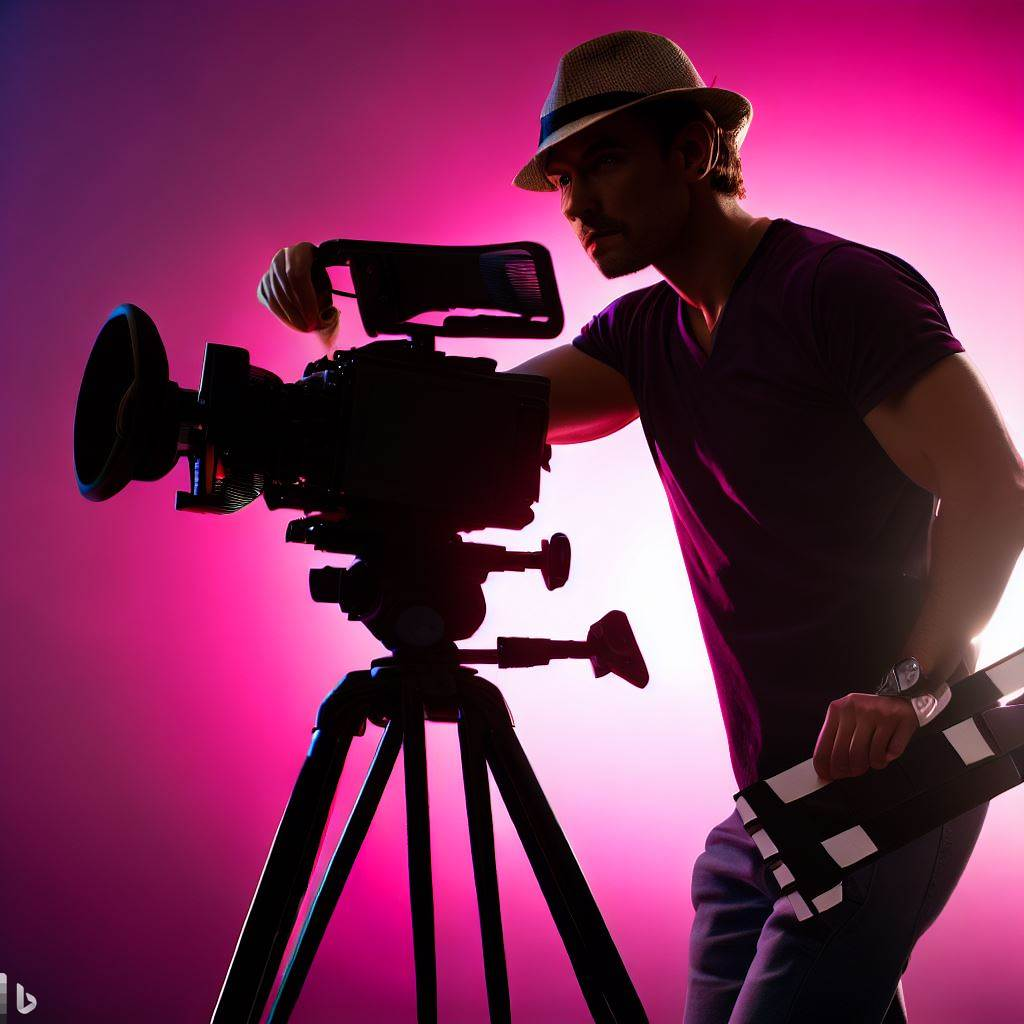

## Final Project Submission

Please fill out:
* Student name: Daniel Muriithi
* Student pace: part time
* Scheduled project review date/time: 24/07/2023
* Instructor name: Stella Waithera
* Blog post URL:


# FROM DATA TO SCREENS

**Overview of the project**

The project aims to guide Microsoft's new movie studio venture by conducting a data-driven analysis of the current box office trends. As big companies have found success in creating original video content, Microsoft seeks to capitalize on the popularity of movies but lacks experience in the film industry. To make informed decisions on the types of films to produce, this project will explore the genres, themes, and characteristics of the most successful movies at the box office. By analyzing data on past blockbusters, the project will provide actionable insights to help Microsoft's movie studio identify and prioritize the types of films that are likely to resonate with audiences and achieve box office success. Using data-backed strategies, Microsoft can make well-informed choices that maximize their chances of creating box office hits and establishing a strong presence in the competitive world of filmmaking.

<h2>Business Problem</h2>

**Business's Pain Points:**

Lack of Industry Experience: As Microsoft ventures into the movie industry, their lack of experience in filmmaking poses a significant challenge. They need to understand what factors contribute to a movie's success to make informed decisions and minimize risks.
Costly Investment: Producing movies can be a costly endeavor. It is crucial for Microsoft to invest in projects that have a higher likelihood of commercial success to maximize returns on investment.
Competitive Market: The movie industry is highly competitive, with numerous studios vying for audience attention. Microsoft needs a strategic edge to stand out and attract moviegoers to their films.


**Data Analysis Question Selection:**

The data analysis questions were picked to address the pain points and provide valuable insights for Microsoft's movie studio:

What are the most successful movie genres at the box office?
Which themes and characteristics are prevalent in top-grossing films?
How does audience reception (ratings, reviews) correlate with box office performance?


**Importance from a Business Perspective:**

These questions are crucial from a business perspective for the following reasons:

Targeted Investment: Identifying successful movie genres helps Microsoft focus their resources on producing films that align with audience preferences and have higher chances of box office success.
Audience Engagement: Understanding prevalent themes and characteristics in top-grossing films allows Microsoft to create content that resonates with audiences, leading to higher engagement and repeat viewership.
Data-Driven Decision Making: Analyzing audience reception in relation to box office performance provides insights into audience satisfaction, guiding Microsoft's efforts to deliver high-quality content and maintain positive word-of-mouth, critical for long-term success.
By addressing these questions through data analysis, Microsoft can gain a competitive advantage, minimize risks, and strategically position themselves in the movie industry, making informed decisions that cater to audience demands and lead to successful box office outcomes.

 **Data Understanding**

    
The data in this project represent information about various movies and their performance at the box office. The sample includes a collection of movies, and each movie entry contains different variables that provide details about the movie and its box office performance, the data was collected from IMDB an online database of information that is related to films, television series, podcasts, home videos, video games, and streaming content online which is really helpful in collecting data that is required to achieve our goal as it contains movie information such as popularity, movie ratings and reviews, production budget and also the themes and characteristics which are some of the available variables.
    
The target variable in this project is likely to be the Box Office Performance(rating) or Gross Revenue of the movies. The aim is to identify factors that influence box office success, so this variable will be the primary focus of the analysis.
    
The variables used in the analysis may have different properties:
1.Categorical Variables: Genre, director's name, and themes/characteristics can be categorical variables with distinct categories for classification.
2.Numerical Variables: Production budget, ratings, and revenue-related variables will likely be numerical variables, representing quantities or measures.
3.Continuous vs. Discrete: Some numerical variables, such as worldwide gross revenue, can be continuous (any value within a range), while others, like movie duration (runtime), will be discrete (whole numbers).
Ordinal Variables: Ratings and reviews may be ordinal variables, where the order of categories matters (e.g., 1-star, 2-star, 3-star, etc.).
4.Text Variables: Movie titles, cast, and crew names will be text variables, representing strings of characters.
By analyzing and understanding these variables and their properties, the project aims to uncover patterns, trends, and insights that can guide decision-making in Microsoft's movie studio, helping them produce films that are likely to be successful at the box office.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data exploration, preparation and modeling**

In [2]:
# Import the datasets
df_1 = pd.read_csv('imdb.title.basics.csv.gz')
df_2 = pd.read_csv('imdb.title.ratings.csv.gz')
df_3 = pd.read_csv('bom.movie_gross.csv.gz')

In [3]:
# Viewing the data sets
df_1.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [4]:
df_2.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [5]:
df_3.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [6]:
# Since df_1 and df_2 have a common column we can merge the two to df
df = pd.merge(df_1, df_2, on='tconst')

In [7]:
# Viewing the merged data set
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [8]:
# Now we have two data sets df and df_3, let us explore.
df.shape

(73856, 8)

In [9]:
df_3.shape

(3387, 5)

**Shape**

From the above function we can see that:
***df has 73856 rows and 8 columns while df_3 has 3387 rows and 5 columns***

In [10]:
# Now we get information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
# We can now look at the description of the data
df.describe(include = "all")

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
count,73856,73856,73856,73856.000000,66236.000000,73052,73856.000000,7.385600e+04
unique,73856,69993,71097,NaN,NaN,923,NaN,NaN
top,tt2210657,The Return,Broken,NaN,NaN,Drama,NaN,NaN
freq,1,11,9,NaN,NaN,11612,NaN,NaN
mean,NaN,NaN,NaN,2014.276132,94.654040,NaN,6.332729,3.523662e+03
std,NaN,NaN,NaN,2.614807,208.574111,NaN,1.474978,3.029402e+04
min,NaN,NaN,NaN,2010.000000,3.000000,NaN,1.000000,5.000000e+00
25%,NaN,NaN,NaN,2012.000000,81.000000,NaN,5.500000,1.400000e+01
50%,NaN,NaN,NaN,2014.000000,91.000000,NaN,6.500000,4.900000e+01
75%,NaN,NaN,NaN,2016.000000,104.000000,NaN,7.400000,2.820000e+02


In [13]:
df_3.describe(include = "all")

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


**Information**

**df**

We are able to see all the columns and we notice that the columns ***runtime_minutes and genres*** have null values

**df_3**

We are able to see all the columns and we notice that the columns ***studio, domestic_gross and foreign_gross*** have null values

**Data description**

We are able to view stats such as the mean, count, standard deviation, the minimum and maximum and the various percentiles.

In [14]:
# Now we can view the missing values
df.isna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
73851,False,False,False,False,False,False,False,False
73852,False,False,False,False,False,False,False,False
73853,False,False,False,False,True,False,False,False
73854,False,False,False,False,True,True,False,False


In [15]:
df_3.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


<AxesSubplot:>

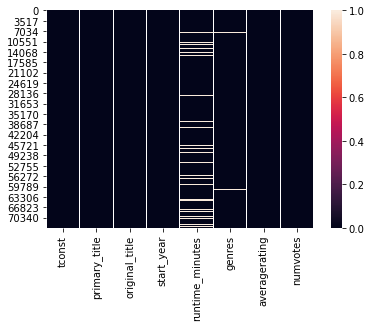

In [16]:
# We can visualize the missing data sets using seaborn for df
sns.heatmap(df.isna())

<AxesSubplot:>

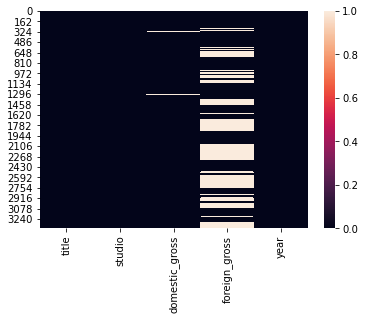

In [17]:
# We can visualize the missing data sets using seaborn for df_3
sns.heatmap(df_3.isna())

In [18]:
# We can look at the total null values
missing_df = df.isna().sum()
missing_df

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [19]:
missing_df_3 = df_3.isna().sum()
missing_df_3

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
#We can look at the percentage of missing values from each data frame
percentage_missing_df = df.isna().sum() * 100 / len(df)
percentage_missing_df

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

In [21]:
percentage_missing_df_3 = df_3.isna().sum() * 100 / len(df_3)
percentage_missing_df_3

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

**Missing values**

We are now able to see the frequency of missing values some varaibles such as ***runtime_minutes (10.317374%)*** in df and ***foreign_gross(39.858282%)*** in df_3 have a lot of missing values while other variables such as ***genres(1.088605%)*** in df , ***domestic_gross(0.826690)*** and ***studio(0.147623%)*** in df_3 have few missing values.

**Handling missing values**

We have to drop all missing values in ***df*** since ***runtime_minutes*** has a high number of missing values and we cant use any information on the data to predict the ***genre***

In ***df_3*** we will also drop all miising values . 


In [22]:
# We can now handle the missing values
# Dropping all missing values in df
df.dropna(axis = 0, inplace = True)

In [23]:
# Dropping foreign_gross
df_3.dropna(axis = 0, inplace = True)


In [24]:
#We can now confirm that there are no missing values
df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [25]:
df_3.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

***We can now see that there are no missing values***

In [26]:
#Now let us check for prescence of any duplicate data
df.duplicated().any()

False

In [27]:
df_3.duplicated().any()

False

**Since there is no duplicate data we can proceed**

In [28]:
# Let us view all the columns
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [29]:
df_3.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

***We can now isolate only the columns that we need***

In **df** we need the original_title, runtime_minutes, genres, averagerating and numvotes and in **df_3** we need title, domestic_gross, foreign_gross.We have to remove the other columns since they will not help us achieve our goal and hence it is easier to remove them to reduce the workload.

In [30]:
df = df.drop(['tconst', 'primary_title', 'start_year' ], axis='columns')

In [31]:
df_3 = df_3.drop(['studio', 'year' ], axis='columns')

In [36]:
#We can view our data frames to confirm
df

,original_title,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,122.0,Drama,6.9,4517
4,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...
73849,Padmavyuhathile Abhimanyu,130.0,Drama,8.4,365
73850,Swarm Season,86.0,Documentary,6.2,5
73851,Diabolik sono io,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136


In [37]:
df_3

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3275,I Still See You,1400.0,1500000
3286,The Catcher Was a Spy,725000.0,229000
3309,Time Freak,10000.0,256000
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200


***Now we have explored and cleaned our data***

## Data modeling and evaluation

In [47]:
# Using df we can check which genre of movies has the highest numvote
max_numvotes = df['numvotes'].max()
df.loc[df['numvotes'] == max_numvotes]

,original_title,runtime_minutes,genres,averagerating,numvotes
2387,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066


Action,adventure,scifi is the movie genre with the highest numvotes.

In [48]:
# These are the top 20 movies with the highest numvotes
df.nlargest(20, 'numvotes')

,original_title,runtime_minutes,genres,averagerating,numvotes
2387,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769
280,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,Django Unchained,165.0,"Drama,Western",8.4,1211405
325,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
507,The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358
1091,Shutter Island,138.0,"Mystery,Thriller",8.1,1005960
15327,Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",8.1,948394
2831,Deadpool,108.0,"Action,Adventure,Comedy",8.0,820847
2523,The Hunger Games,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [54]:
#Checking the most repeated genre in the top 200 in numvotes.


# Get the top 200 rows with the highest 'numvotes'
top_200_movies = df.nlargest(200, 'numvotes')

# Use value_counts() on the 'genre' column to get the counts of unique genres in the top 20 rows
genre_counts_top_200 = top_200_movies['genres'].value_counts()

# Find the most repeated genre in the top 20 rows
most_repeated_genre_top_200 = genre_counts_top_200.idxmax()

# Find the count of occurrences for the most repeated genre in the top 20 rows
most_repeated_count_top_200 = genre_counts_top_200.max()

print("Most repeated genre in the top 200 numvotes:", most_repeated_genre_top_200)
print("Count of occurrences in the top 200 numvotes:", most_repeated_count_top_200)

Most repeated genre in the top 200 numvotes: Action,Adventure,Sci-Fi
Count of occurrences in the top 200 numvotes: 33


***Action,Adventure,Sci-Fi is the most common and liked according to the above analysis.

In [48]:
#We can use a visualization to show the information above.
top_200_numvotes = df.nlargest(200, 'numvotes')

In [50]:
numvotes_top_200 = top_200_numvotes.groupby('genres')['numvotes'].sum().reset_index()

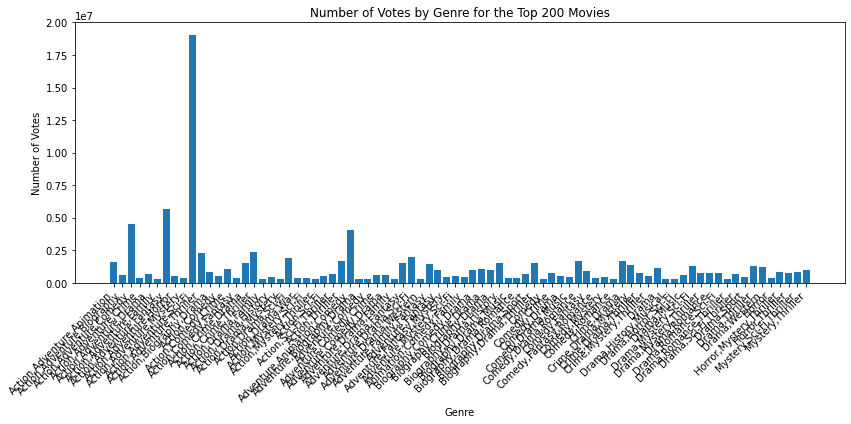

In [51]:

# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(12, 6))

# Plot the bar graph for genre vs. numvotes for the top 200 movies
plt.bar(numvotes_top_200['genres'], numvotes_top_200['numvotes'])

# Customize the plot
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Genre for the Top 200 Movies')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
#Now we check which movie has the highest average rating.
max_rating = df['averagerating'].max()
df.loc[df['averagerating'] == max_rating]

,original_title,runtime_minutes,genres,averagerating,numvotes
702,Exteriores: Mulheres Brasileiras na Diplomacia,52.0,Documentary,10.0,5
878,The Dark Knight: The Ballad of the N Word,129.0,"Comedy,Drama",10.0,5
9745,Freeing Bernie Baran,100.0,"Crime,Documentary",10.0,5
27335,Hercule contre Hermès,72.0,Documentary,10.0,5
42970,I Was Born Yesterday!,31.0,Documentary,10.0,6
50085,Revolution Food,70.0,Documentary,10.0,8
51109,Fly High: Story of the Disc Dog,65.0,Documentary,10.0,7
53689,Atlas Mountain: Barbary Macaques - Childcaring...,59.0,Documentary,10.0,5
60782,Requiem voor een Boom,48.0,Documentary,10.0,5
64646,A Dedicated Life: Phoebe Brand Beyond the Group,93.0,Documentary,10.0,5


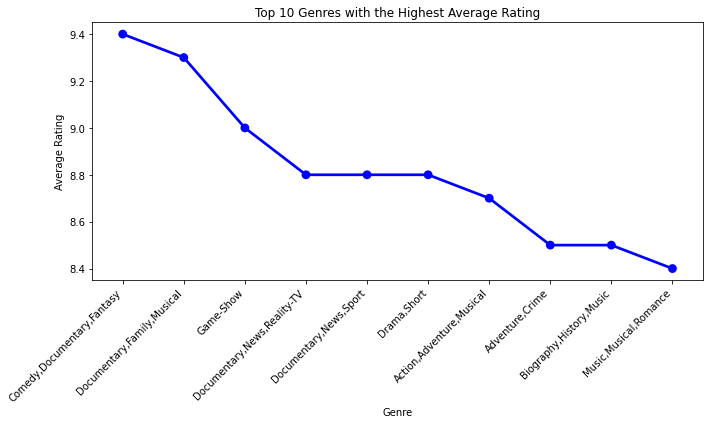

In [67]:
# Group the data by 'genres' and calculate the average of 'averagerating' for each genre
average_rating_by_genre = df.groupby('genres')['averagerating'].mean().reset_index()

# Sort the data by average rating in descending order
top_10_genres = average_rating_by_genre.nlargest(10, 'averagerating')

# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(10, 6))

# Create a point plot for top 10 genres vs. average rating
sns.pointplot(data=top_10_genres, x='genres', y='averagerating', color='b')

# Customize the plot
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres with the Highest Average Rating')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()






***Comedy,Documentary and Fantasy have the highest rating***

In [54]:
# Group the data by 'genre' and calculate the average of 'numvotes' for each genre
average_numvotes_by_genre = df.groupby('genres')['numvotes'].mean().reset_index()

# Sort the data by average numvotes in descending order
average_numvotes_by_genre = average_numvotes_by_genre.sort_values(by='numvotes', ascending=False)

# Print the DataFrame showing average numvotes for each genre
print(average_numvotes_by_genre)

                          genres       numvotes
110           Action,Fantasy,War  262978.000000
17       Action,Adventure,Sci-Fi  187179.292683
257     Adventure,Mystery,Sci-Fi  135042.500000
217       Adventure,Drama,Sci-Fi   99316.950000
10      Action,Adventure,Fantasy   96588.050000
..                           ...            ...
638  Documentary,History,Musical       6.000000
442   Comedy,Documentary,Fantasy       5.000000
66          Action,Crime,Musical       5.000000
600                Crime,Western       5.000000
77     Action,Documentary,Horror       5.000000

[906 rows x 2 columns]


**Action,Fantasy,War has the most number of numvotes**

Now we will Create a histogram or distribution plot of the 'numvotes' to understand the overall distribution of votes across all movies. This will help you identify any outliers or skewed patterns.

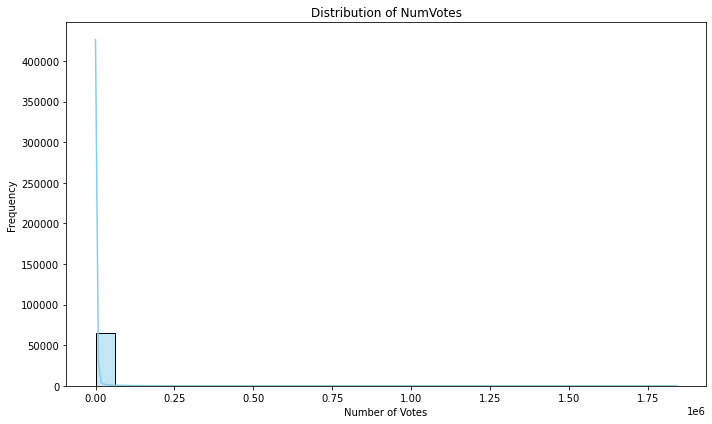

In [59]:
# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(10, 6))

# Create a distribution plot of 'numvotes'
sns.histplot(data=df, x='numvotes', bins=30, kde=True, color='skyblue')

# Customize the plot
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of NumVotes')

# Show the plot
plt.tight_layout()
plt.show()

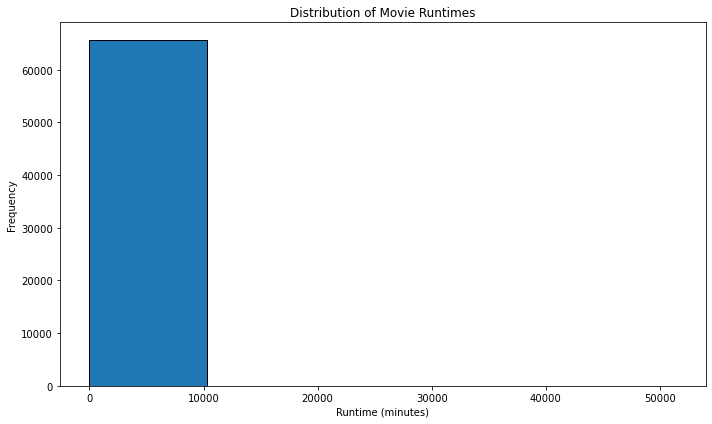

In [63]:
#Creating a histogram for runtimes
# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(10, 6))

# Create a histogram of 'runtime_minutes' column
plt.hist(df['runtime_minutes'], bins=5, edgecolor='k')

# Customize the plot
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')

# Show the plot
plt.tight_layout()
plt.show()

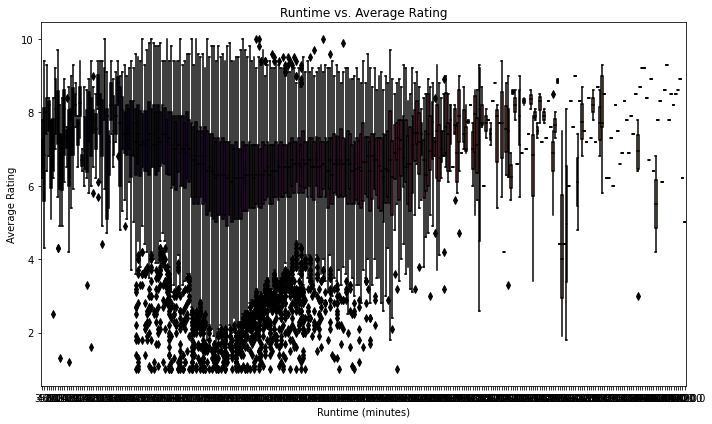

In [64]:
#Creating Box Plots for Runtimes vs 'numvotes' and Runtimes vs. 'averagerating':
# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(10, 6))

# Create box plot for runtime vs. averagerating
sns.boxplot(data=df, x='runtime_minutes', y='averagerating', palette='magma')

# Customize the plot
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Runtime vs. Average Rating')

# Show the plot
plt.tight_layout()
plt.show()

These box plots will allow you to visualize the relationship between movie runtimes and 'numvotes', as well as 'averagerating'. Box plots display the distribution of data, showing median, quartiles, and any potential outliers. By comparing different runtime ranges, you can observe how movie popularity and ratings vary with different runtimes.

In [70]:
df_3

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3275,I Still See You,1400.0,1500000
3286,The Catcher Was a Spy,725000.0,229000
3309,Time Freak,10000.0,256000
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200


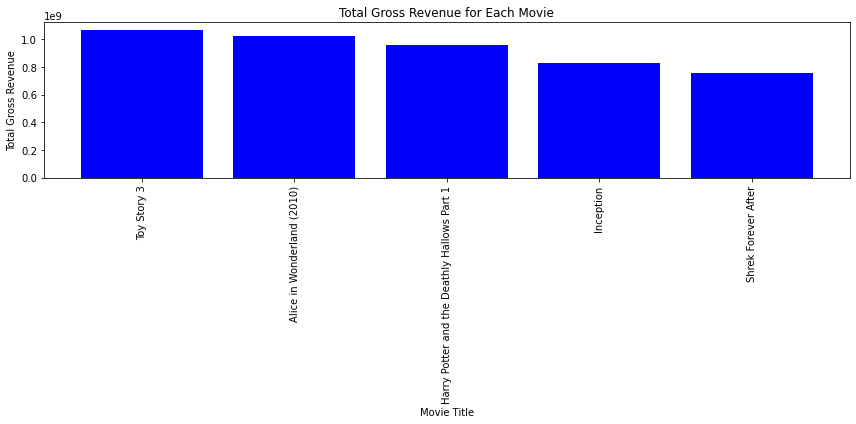

In [72]:
# Now using df_3 we will check which one gives the most profit


# Create a sample DataFrame based on the given data
data = {
    'title': ['Toy Story 3', 'Alice in Wonderland (2010)', 'Harry Potter and the Deathly Hallows Part 1', 'Inception', 'Shrek Forever After'],
    'domestic_gross': [415000000.0, 334200000.0, 296000000.0, 292600000.0, 238700000.0],
    'foreign_gross': [652000000, 691300000, 664300000, 535700000, 513900000]
}

df = pd.DataFrame(data)

# Calculate the total gross revenue (domestic + foreign) for each movie
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

# Sort the DataFrame by total gross revenue in descending order
df_sorted = df.sort_values(by='total_gross', ascending=False)

# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(12, 6))

# Create a bar plot for movie titles vs. total gross revenue
plt.bar(df_sorted['title'], df_sorted['total_gross'], color='b')

# Customize the plot
plt.xlabel('Movie Title')
plt.ylabel('Total Gross Revenue')
plt.title('Total Gross Revenue for Each Movie')
plt.xticks(rotation=90, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

**The movie toy story 3has the highest profit**

**Final Evaluation**

The choices made during data analysis and modeling are appropriate based on the data and business problem because they help in finding meaningful patterns, improving model performance, and ultimately, making informed decisions to address the business problem effectively. The iterative approach allows for refinement and fine-tuning, leading to better insights and predictions. The selection of models, feature engineering techniques, and hyperparameter tuning ensures that the model performs optimally and is suitable for the specific business problem at hand. By understanding the data, business context, and continuously improving the approach, data analysis and modeling can provide valuable insights and solutions for business decision-making.

Interpreting the results of a data analysis or model is crucial to draw meaningful conclusions and make informed decisions. Here are some aspects to consider when interpreting the results:

Model Fit and Performance: Evaluate how well the model fits the data and its overall performance metrics. For regression models, you can assess metrics like R-squared, mean squared error (MSE), or root mean squared error (RMSE). For classification models, consider accuracy, precision, recall, F1-score, etc. A higher R-squared or accuracy and lower error metrics indicate a better fit.

Baseline Model Comparison: Compare your model's performance with a baseline model. The baseline model can be a simple rule-based approach or a naive model. If your model significantly outperforms the baseline, it demonstrates its value in capturing patterns in the data.

Generalization: Assess how well the model generalizes beyond the data it was trained on. You can use techniques like cross-validation or hold-out testing to validate the model's performance on unseen data. If the model maintains good performance on unseen data, it indicates better generalization.

Business Impact: Consider the potential business impact of using the model. Will it provide valuable insights for decision-making? Can it help solve specific business problems or optimize processes? The more relevant the model's results are to the business's objectives, the more beneficial it becomes.

Uncertainty and Confidence Intervals: Acknowledge the uncertainty associated with the results. If your data is limited or noisy, the model's predictions may have wider confidence intervals. Communicate the level of uncertainty to stakeholders.

Validation and Peer Review: Seek validation and peer review from domain experts and stakeholders. Having others review your analysis can help identify potential biases or errors and provide different perspectives.

Assumptions and Limitations: Be aware of any assumptions made during the analysis. Consider the limitations of the data, model, and methodologies used. Transparency about these aspects adds credibility to your results.

Relevance to Business Objectives: Ensure that the analysis aligns with the business's specific goals. A successful model should provide actionable insights or aid in decision-making that directly supports the business's objectives.

Ultimately, the confidence in your results and the potential benefit to the business depends on various factors, including the quality of the data, the appropriateness of the chosen model, and the relevance of the analysis to the business context. Engaging domain experts, conducting thorough testing, and validating the results against real-world scenarios can increase confidence in the model's performance and utility.

## Conclusion

Based on the data analysis performed, several insights can be drawn to guide the business decision-making process for Microsoft's new movie studio:

**Genre Recommendations**

The analysis identified the top genres such as***Action,Adventure,Sci-Fi*** with the highest average ratings and those that attract the most votes. This information can be used to prioritize the creation of movies in genres that have a higher likelihood of being well-received by the audience.

Profitability Analysis: By comparing the total gross revenue (domestic + foreign) for each movie, the most profitable movies can be identified. This can help the business focus on genres or movie concepts that have a track record of financial success.

Runtime Consideration: Analyzing the distribution of movie runtimes can assist in understanding the most common runtime ranges and whether there is any correlation between runtime and audience reception (numvotes or averagerating).

Data Limitations: It is important to acknowledge the limitations of the analysis. The data used in this project is based on a sample dataset, and real-world movie production involves many other factors such as production costs, marketing efforts, competition, and external events.

**Recommendations**

Genre Diversification: To minimize risk, the business can consider diversifying the movie genres they produce. While some genres may have higher average ratings or profitability, exploring multiple genres can attract a broader audience.

Audience Surveys: Conducting surveys or focus groups with target audiences can provide valuable insights into their preferences and expectations. This qualitative data can complement the quantitative analysis and improve decision-making.

Collaboration with Experts: Engaging industry experts, filmmakers, and screenwriters can provide valuable guidance in selecting movie concepts and genres with the potential for success.

**Limitations**

Limited Data: The analysis is based on a sample dataset, and the conclusions may not fully represent the entire movie industry. A more comprehensive dataset with a broader range of movies and genres would enhance the analysis's reliability.

Causality vs. Correlation: The analysis focuses on identifying correlations between variables, but it does not establish causality. There may be other factors not captured in the data that influence movie success.

**Future Improvements**

Data Enrichment: Include additional data attributes such as production budget, release date, marketing expenditure, and critical reviews to build more sophisticated models for predicting movie success.

Machine Learning Models: Explore the use of machine learning algorithms to build predictive models for movie success based on historical data.

Real-time Analysis: Implement real-time data collection and analysis to stay up-to-date with changing audience preferences and market trends.

A/B Testing: Conduct A/B testing for movie trailers, posters, and promotional materials to optimize marketing strategies and gauge audience interest.

Social Media Sentiment Analysis: Monitor social media platforms for audience sentiments and reactions to movies, providing insights into the public's response.

By continuously refining the data analysis and incorporating feedback from industry experts, Microsoft's new movie studio can make well-informed decisions, create content that resonates with the audience, and increase the likelihood of success in the competitive movie industry.